In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches from a directory
training_set = train_datagen.flow_from_directory(
    'C:/Users/Admin/Desktop/task3/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# Flow validation images in batches from a directory
test_set = test_datagen.flow_from_directory(
    'C:/Users/Admin/Desktop/task3/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# Create a Sequential model
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
cnn.summary()

# Train the model
r = cnn.fit(training_set, validation_data=test_set, epochs=15)


Found 8005 images belonging to 1 classes.
Found 2023 images belonging to 1 classes.


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 85s 309ms/step - accuracy: 0.9758 - loss: 0.0223 - val_accuracy: 1.0000 - val_loss: 7.2833e-14
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 70s 272ms/step - accuracy: 1.0000 - loss: 1.5144e-11 - val_accuracy: 1.0000 - val_loss: 7.2827e-14
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 70s 273ms/step - accuracy: 1.0000 - loss: 2.2198e-12 - val_accuracy: 1.0000 - val_loss: 7.2824e-14
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 70s 275ms/step - accuracy: 1.0000 - loss: 5.2691e-12 - val_accuracy: 1.0000 - val_loss: 7.2822e-14
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 71s 278ms/step - accuracy: 1.0000 - loss: 2.9152e-11 - val_accuracy: 1.0000 - val_loss: 7.2806e-14
Epoch 6/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 70s 274ms/step - accuracy: 1.0000 - loss: 2.3581e-11 - val_accuracy: 1.0000 - val_loss: 7.2791e-14
Epoch 7/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 47s 185ms/step - accuracy: 1.0000 - loss: 7.2571e-13 - val_accuracy: 1.0000 - val_loss: 7.2789e-14
Epoch 8/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 48

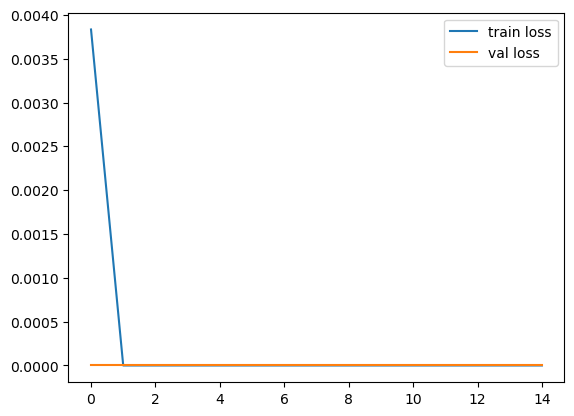

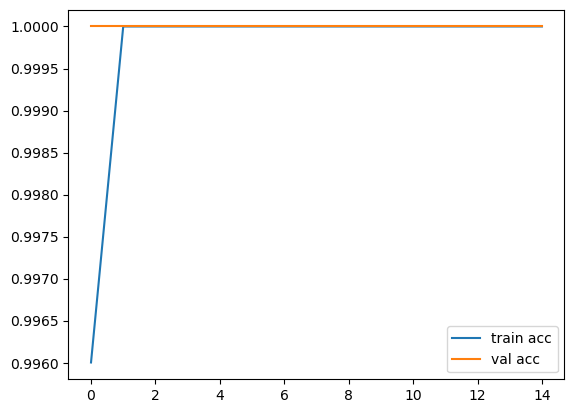

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

cnn.save('model_rcat_dog.h5')

In [ ]:
from tensorflow.keras.models import load_model

# load model
model = load_model('model_rcat_dog.h5')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,219 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:\\Users\\Admin\\Desktop\\task3\\test_set\\test_set\dogs\\dog.4001.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


array([[1.29291895e-27]], dtype=float32)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:\\Users\\Admin\\Desktop\\task3\\test_set\\test_set\\cats\\cat.4001.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[9.073929e-32]], dtype=float32)

In [ ]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog
